In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
target = pd.DataFrame(data.target, columns=['cluster'])
data = pd.DataFrame(data.data,columns=data.feature_names)
data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
data = pd.concat([data, target],axis='columns')

In [4]:
data

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [6]:
mms = MinMaxScaler()
data['petal length (cm)'] = mms.fit_transform(data[['petal length (cm)']])
data['petal width (cm)'] = mms.fit_transform(data[['petal width (cm)']])

In [7]:
data

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [8]:
import matplotlib.pyplot as plt

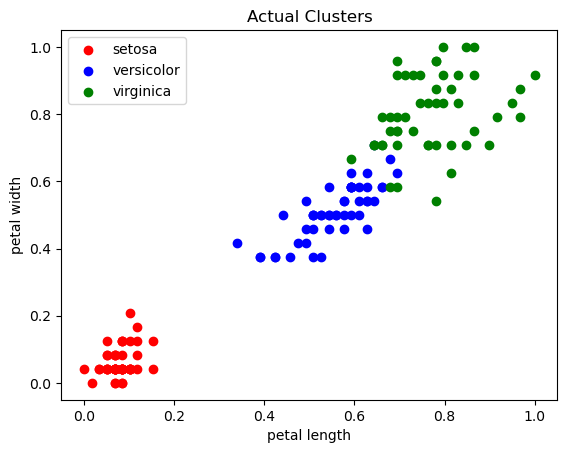

In [9]:
df0 = data[data['cluster']==0]
df1 = data[data['cluster']==1]
df2 = data[data['cluster']==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],label='setosa',color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='versicolor',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='virginica',color='green')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.title('Actual Clusters')
plt.show()

In [10]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(data.drop(['cluster'],axis='columns'))

c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
pred_data = pd.concat([data,pd.Series(y_pred,name='pred_cluster')],axis='columns')
pred_data.drop(['cluster'],axis='columns',inplace=True)

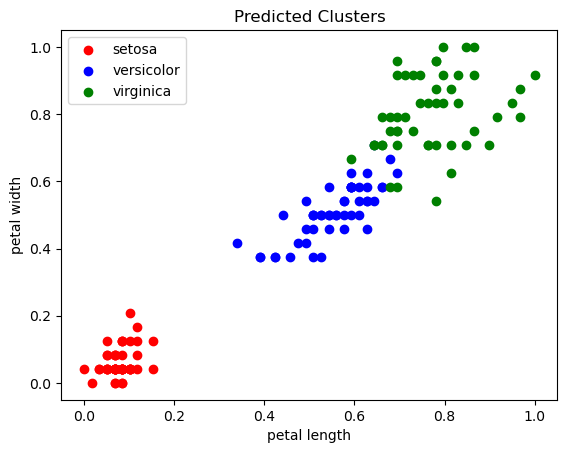

In [12]:
pred_df0 = pred_data[pred_data['pred_cluster']==0]
pred_df1 = pred_data[pred_data['pred_cluster']==1]
pred_df2 = pred_data[pred_data['pred_cluster']==2]

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],label='setosa',color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='versicolor',color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='virginica',color='green')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()
plt.title('Predicted Clusters')
plt.show()

In [13]:
sse = []
for n in range(1,10):
    km = KMeans(n_clusters=n)
    km.fit(data.drop(['cluster'],axis='columns'))
    sse.append(km.inertia_)

c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\User\miniconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known

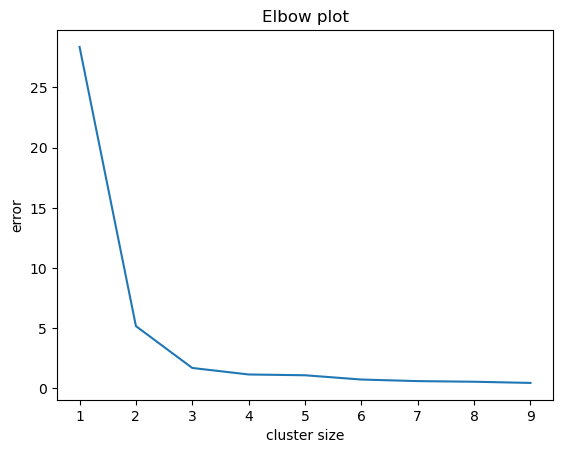

In [15]:
plt.plot(list(range(1,10)),sse)
plt.title('Elbow plot')
plt.xlabel('cluster size')
plt.ylabel('error')
plt.show()